Taller 1

In [265]:
import numpy as np
import matplotlib.pyplot as plt

Punto 1

In [266]:
def transformada_de_fourier(ts,ys,f):
    transformada=0
    i=1j
    for j in range(len(ys)):
        transformada+=ys[j]*np.exp(-2*np.pi*i*ts[j]*f)
    return transformada

Punto 2

In [267]:
N=500
tmax=50
ts=np.linspace(0,tmax,N)
ys1=np.sin(2*np.pi*np.sqrt(2)*np.linspace(0,tmax,N))
#ys2=np.sin(np.linspace(0,tmax,N))

In [268]:
transformada_de_fourier(ts,ys1,0.1)
#transformada_de_fourier(np.linspace(0,tmax,N),prueba2,0.1)


(0.8264239171705147+0.08268939883313509j)

Graficando

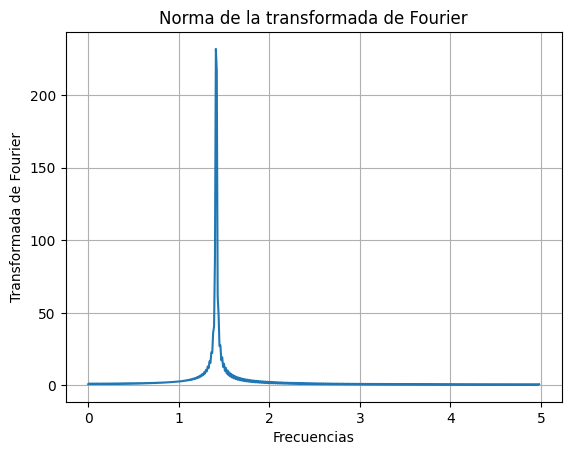

In [269]:
f_ny = 1/(ts[1]-ts[0])
frecuencias=np.arange(0,f_ny/2,0.01)
transformadas=[]
for i in frecuencias:
    transformada_iterada=transformada_de_fourier(ts,ys1,i)
    norma=abs(np.linalg.norm(transformada_iterada))
    transformadas.append(norma)

plt.plot(frecuencias,transformadas)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier")
plt.title("Norma de la transformada de Fourier")
plt.grid()
plt.show()

Señal con ruido

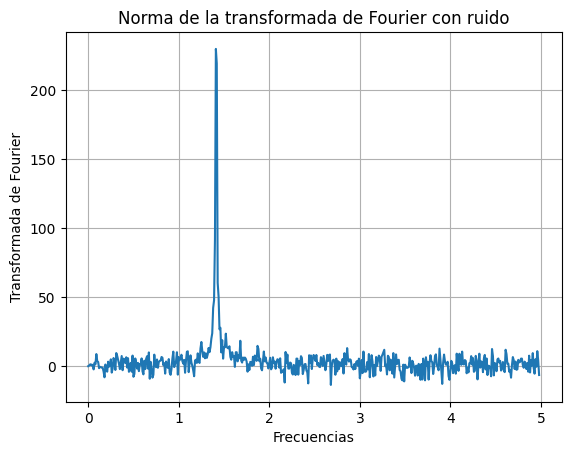

In [270]:
ruido=transformadas.copy()
ruido+=np.random.normal(0.0,5,len(transformadas)) 
plt.plot(frecuencias,ruido)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier")
plt.title("Norma de la transformada de Fourier con ruido")
plt.grid()
plt.show()

Los picos se mantienen pero los demas datos presentan una cambio significativo.

Punto 3


In [271]:
#encontrar el pico principal
pico_max=np.max(transformadas)
print('Altura Maxima',pico_max)
frecuencia_max=transformadas[np.argmax(pico_max)]
media_altura=pico_max/2
x_left = np.interp(media_altura, transformadas[:np.argmax(transformadas)], frecuencias[:np.argmax(transformadas)])
x_right = np.interp(media_altura, transformadas[np.argmax(transformadas):], frecuencias[np.argmax(transformadas):])
fwhm = x_right - x_left
print('FWHM:',fwhm)



Altura Maxima 231.91632779493276
FWHM: 3.58


Cambie sólo el número de muestras 𝑁. ¿Cambia la posición del pico o su ancho? ¿Por qué?\

Si cambio el numero de muestras N, cambia la posicion de su pico y de su ancho.

Cambie sólo el rango de tiempo 𝑡max ¿Cambia la posición del pico o su ancho? ¿Por qué?\
Cambia su posicion pero no su ancho.

Punto 4


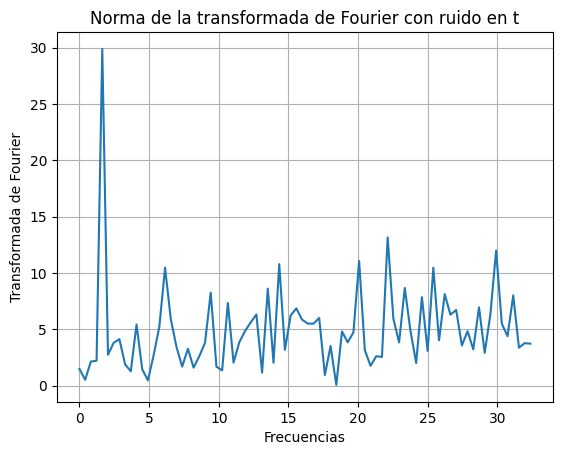

In [272]:
N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)
f_ny=1/(ts[1]-ts[0])
frecuencias=np.linspace(0,5*f_ny,len(ts))
transformadas_truido=[]
transformada_iterada=0
for i in frecuencias:
    transformada_iterada=transformada_de_fourier(ts,ys,i)
    norma=abs(np.linalg.norm(transformada_iterada))
    transformadas_truido.append(norma)
plt.plot(frecuencias,transformadas_truido)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier")
plt.title("Norma de la transformada de Fourier con ruido en t")
plt.grid()
plt.show()

Evalúe la transformada hasta varias veces la frecuencia de Nyquist. ¿Es posible recuperar la frecuencia
original? ¿Por qué?

No es posible debido a que el ruido es aleatorio, razon por la cual nos va a dar diferentes valores todo el tiempo.